In [1]:
#리셋

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# 사이파이는 미분 최적화에 관련된 함수가 있고 그 중에서 미니마이즈를 이용한다.
%matplotlib inline

In [2]:
#초기화 단계
np.random.seed(seed=1) # 난수고정 실행 할때 마다 난수가 일정하다.
w = np.array([3./4. , 1.0 , -4./5.]) # 교제에 있는 식이다.
n = 50
dim = 2 # 이차원 

# 회귀에서는 특징이 x0으로 1차원이였어요. 
# 그런데 여기서는 x0 x1로 특징이 두개에요.
# 그래서 이차원이다.

k = 2

# 클래스는 k 클래스가 두개이니 2이다. X와 O로 드게

scale = 1 #랜덤수에 곱하는 수

t = np.zeros((n,k), dtype=np.uint8) 

# t는 목표값을 가진다. 즉 X 아니면 O 로 두개로 나눠준다.
# 즉 T 행렬을 만든다. 그리고 X 가 배열 위치 0 이고
# O가 배열위치 1라고 한다면 결과값에 따라서 그 위치에 값을 넣어준다

print(t)

x = scale*np.random.rand(n,dim)

# 랜덤의 점들을 쭉 생성을 한다.

print(x)

[[0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]]
[[4.17022005e-01 7.20324493e-01]
 [1.14374817e-04 3.02332573e-01]
 [1.46755891e-01 9.23385948e-02]
 [1.86260211e-01 3.45560727e-01]
 [3.96767474e-01 5.38816734e-01]
 [4.19194514e-01 6.85219500e-01]
 [2.04452250e-01 8.78117436e-01]
 [2.73875932e-02 6.70467510e-01]
 [4.17304802e-01 5.58689828e-01]
 [1.40386939e-01 1.98101489e-01]
 [8.00744569e-01 9.68261576e-01]
 [3.13424178e-01 6.92322616e-01]
 [8.76389152e-01 8.94606664e-01]
 [8.50442114e-02 3.90547832e-02]
 [1.69830420e-01 8.78142503e-01]
 [9.83468338e-02 4.21107625e-01]
 [9.57889530e-01 5.33165285e-01]
 [6.91877114e-01 3.15515631e-01]
 [6.86500928e-01 8.34625672e-01]
 [1.82882773e-02 7.501

In [3]:
#랜덤 데이터에 0이냐 1이냐를 설정해주는 부분

# 위에서 t는 모두 0이 나왔기 때문에 t 값을 설정해주는 것이다

for i in range(n):
    for j in range(k):
        if w[0] * x[i,0] + w[1] * x[i,1] + w[2] > 0:
            t[i, 1] = 1 # 0보다 크면 1 클래스
        else :
            t[i, 0] = 1 # 0보다 작으면 0 클래스

print(x[:5, :]) # x0 값과 x1 의 값 각각의 셈플
print(t[:5, :]) # 각각의 셈플에 대한 결과

[[4.17022005e-01 7.20324493e-01]
 [1.14374817e-04 3.02332573e-01]
 [1.46755891e-01 9.23385948e-02]
 [1.86260211e-01 3.45560727e-01]
 [3.96767474e-01 5.38816734e-01]]
[[0 1]
 [1 0]
 [1 0]
 [1 0]
 [0 1]]


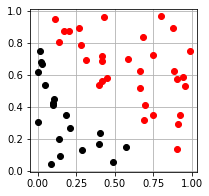

In [4]:
def show_data(x,t):
    c = [[0,0,0], [1,0,0]] # 검정과 빨강색으로 클래스를 구분해서 나타내라
    for i in range(k):
        plt.plot(x[t[:,i] == 1, 0], x[t[:,i] == 1, 1], linestyle='none',marker='o', color=c[i])
       
          #c는 색깔
#         k는 2차원이라서 i 값은 0과 1의 값을 가진다.
#         따라서 0 일때와 1일때 나눠서 뿌려라 이말이다.
        plt.grid(True)
        
plt.figure(figsize=(3,3))
show_data(x,t)

In [5]:
 #시그모이드 함수 설정하기
    
def logistic2(x0,x1,w):
    y = 1 / (1 + np.exp(-(w[0] * x0 + w[1] * x1 + w[2] ))) # 시그모이드 함수
    
    # 직선의 식이 = (w[0] * x0 + w[1] * x1 + w[2] )
    
    return y

In [6]:
#크로스 entropy 함수

def cee_logistic2(w,x,t):
    x_n = x.shape[0] #샘플의 객수
    y = logistic2(x[:,0], x[:,1], w)
    cee = 0
    for i in range(len(y)):
        cee = cee - (t[i,0] * np.log(y[i]) + (1 - t[i,0]) * np.log(1 - y[i]))
        print(cee)
    cee = cee / x_n #마지막에 50으로 나눠준다.
    return cee

    # - (t[n,0] * np.log(y[n]) + (1 - t[n,0]) * np.log(1 - y[n])) 이것이 크로스 entropy
    
# test
_W = [-1. , -1. , -1.]
cee_logistic2(_W,x,t)

#46분 52초

0.11151226423831138
1.6544441185911853
3.1479066595424703
4.8754109273292725
5.010238908684662
5.125277822640312
5.242713769524307
7.108686514892112
7.238506472663484
8.809884220231096
8.870719937585733
8.996964645224622
9.057683037690879
10.463153066572932
10.584481918446745
12.301828773442484
12.381399885005827
12.507449522958776
12.584752183543754
14.510701366970395
14.573453246266178
14.692320759932386
16.435720833950256
16.54058395900287
18.175308438978565
20.041574822992043
21.724365819800905
23.46266653255337
25.348106973734694
25.444653935757117
27.15948756435407
27.27407466838863
29.046216272746783
29.153446416388093
29.230006896995253
29.352149106636244
29.485585844770647
31.238824017502804
31.33664803560997
31.417315888385268
31.49567796521597
31.611214860459526
31.719761194199567
31.80718718331043
31.904096173271217
32.02358026289424
32.147176371167944
33.968795331699546
34.04944389549817
35.85002555609323


0.7170005111218646

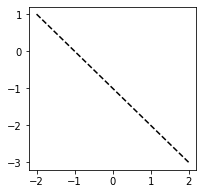

In [8]:
def show_line(w):
    xn = 50 #파라미터의 분할 수
    xrange0 = [-2,2] #X0 범위 표시 용
    x0 = np.linspace(xrange0[0], xrange0[1], xn) #범위를 만들어준다.
    x1 = -(w[0]/w[1])*x0 - w[2]/w[1]
    plt.plot(x0,x1,'--k')
    
#test

plt.figure(figsize=(3,3))
w=[-1, -1, -1]
show_line(w)

In [9]:
def fit_logistic(init, x, t):
    res = minimize(cee_logistic2, init, args=(x,t), method="CG")
    #cee_logistic2의 loss function을 넣어준다,
    #feature와 target을 X,y 값에 넣어준다.
    
    return res.x

E:\Python\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in log
  
E:\Python\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in multiply
  
E:\Python\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in exp
  after removing the cwd from sys.path.
E:\Python\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in log
  
E:\Python\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in multiply
  
E:\Python\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in exp
  after removing the cwd from sys.path.
E:\Python\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in log
  
E:\Python\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in multiply
  
E:\Python\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: overflow 

w0 = -54.00, w1 = -50.15, w2 = 43.29


E:\Python\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in log
  
E:\Python\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in multiply
  
E:\Python\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in exp
  after removing the cwd from sys.path.
E:\Python\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in log
  
E:\Python\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in multiply
  
E:\Python\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in log
  
E:\Python\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in multiply
  


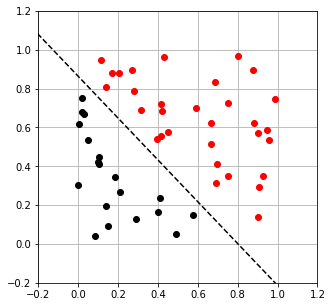

In [11]:
plt.figure(1, figsize=(5,5))
init = [1,1,-1]
w = fit_logistic(init, x, t)
print("w0 = {0:.2f}, w1 = {1:.2f}, w2 = {2:.2f}".format(w[0], w[1],w[2]))

show_data(x,t)
show_line(w)
plt.xlim(-.2, 1.2)
plt.ylim(-.2, 1.2)
plt.show()